## Importing Libraries

In [2]:
import os
import math
import cv2
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras import layers
from PIL import Image, ImageOps
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import seaborn as sns
from skimage import io

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet import ResNet50

## Creating Dataset

In [7]:
def get_classes(img_folder):
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            class_name.append(dir1)           
    return class_name

In [8]:
Y = get_classes('split/train')

In [9]:
len(Y)

121

In [10]:
l = list(set(Y))
for i in range(len(l)):
    print(i+1, l[i])

1 Unmarked
2 Marked


### Splitting train and test set

In [14]:
import os

import numpy as np

import shutil

rootdir = 'custom/Data/train'
dir1 = 'custom/Split'

for i in set(Y):

    os.makedirs(dir1 +'/train/' + i)

    os.makedirs(dir1 +'/validation/' + i)

    source = rootdir + '/' + i

    allFileNames = os.listdir(source)

    np.random.shuffle(allFileNames)

    test_ratio = 0.25

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])

    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
      shutil.copy(name, dir1 +'/train/' + i)

    for name in test_FileNames:
      shutil.copy(name, dir1 +'/validation/' + i)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'custom/Split/train/bhavesh'

## Data Analysis

C:\Users\91822\AppData\Local\Temp\ipykernel_8176\4174491560.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pic = imageio.imread(path)


Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (848, 480, 3)
Image Hight 848
Image Width 480
Dimension of Image 3


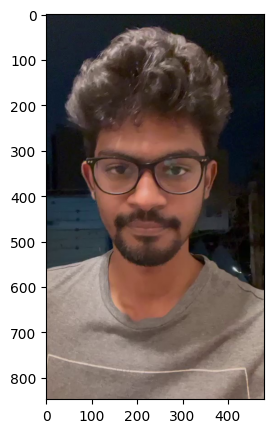

In [15]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

path = 'custom/Data/train/hari/frame0.jpg'
pic = imageio.imread(path)
plt.figure(figsize = (5,5))
plt.imshow(pic)
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Hight {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))

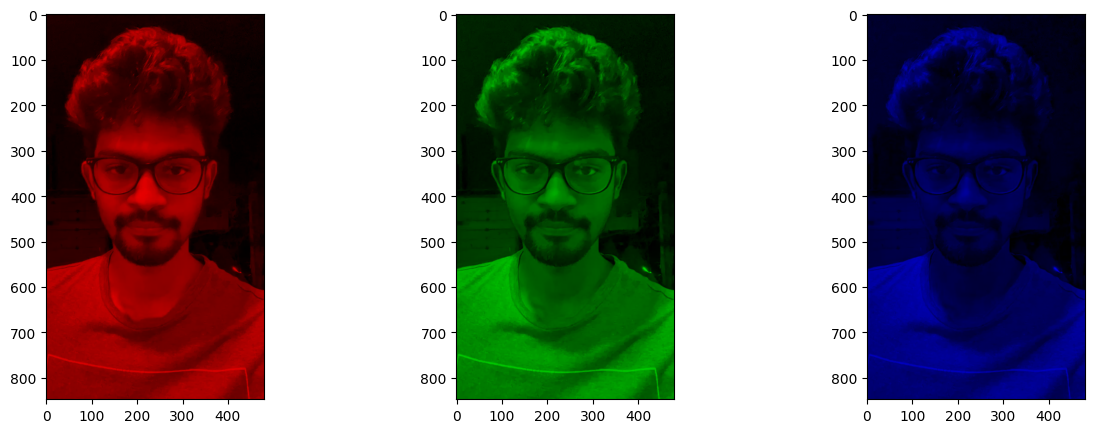

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))  
for c, ax in zip(range(3), ax):            
     split_img = np.zeros(pic.shape, dtype="uint8")      
     split_img[ :, :, c] = pic[ :, :, c]  
     ax.imshow(split_img)

In [11]:
classes = get_classes('Split/train')
labels = set(classes)

In [12]:
print(len(sorted(classes)))

121


In [13]:
print("Labels",labels)
print("Total no. of classes", len(labels))

Labels {'Unmarked', 'Marked'}
Total no. of classes 2


## Data Preprocessing 

### Data Augmentation

In [14]:
datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

In [15]:
from keras.preprocessing.image import ImageDataGenerator

### Train set

In [26]:
image_directory = r'split/train'
SIZE = 64
for dir1 in os.listdir(image_directory):
    dataset = []
    for files in os.listdir(os.path.join(image_directory, dir1)):
        try:
            image = io.imread(image_directory + dir1 + '/' + files,plugin='matplotlib')  
            image = Image.fromarray(image, 'RGB')        
            image = image.resize((SIZE,SIZE)) 
            dataset.append(np.array(image))
        except (IOError, SyntaxError) as e:
            print('Bad file:', image_directory +'/' +dir1 + '/' + files)
    x = np.array(dataset)
    i = 0
    for batch in datagen.flow(x, 
                              batch_size=16,
                              save_to_dir= r'augmented_train/' + dir1,
                              save_format='jpg'):    
        i += 1
        if i > 5:
            break

AttributeError: imread

In [35]:
 
import scipy.misc

In [ ]:
pip uninstall Pillow

In [19]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [25]:
import io
import imageio

### Test set

In [47]:
image_directory = r'custom/Split/validation/'
SIZE = 64
for dir1 in os.listdir(image_directory):
    dataset = []
    for files in os.listdir(os.path.join(image_directory, dir1)):
        try:
            image = io.imread(image_directory + dir1 + '/' + files,plugin='matplotlib')  
            image = Image.fromarray(image, 'RGB')        
            image = image.resize((SIZE,SIZE)) 
            dataset.append(np.array(image))
        except (IOError, SyntaxError) as e:
            print('Bad file:', image_directory + dir1 + '/' + files)
    x = np.array(dataset)
    i = 0
    for batch in datagen.flow(x, 
                              batch_size=16,
                              save_to_dir= r'custom/Split/augmented_validation/' + dir1,
                              save_format='jpg'):    
        i += 1
        if i > 5:
            break

In [48]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [49]:
input_size = (224, 224)
batch_size = 64

### Plotting the images

Found 1590 images belonging to 17 classes.
Found 1397 images belonging to 17 classes.
64


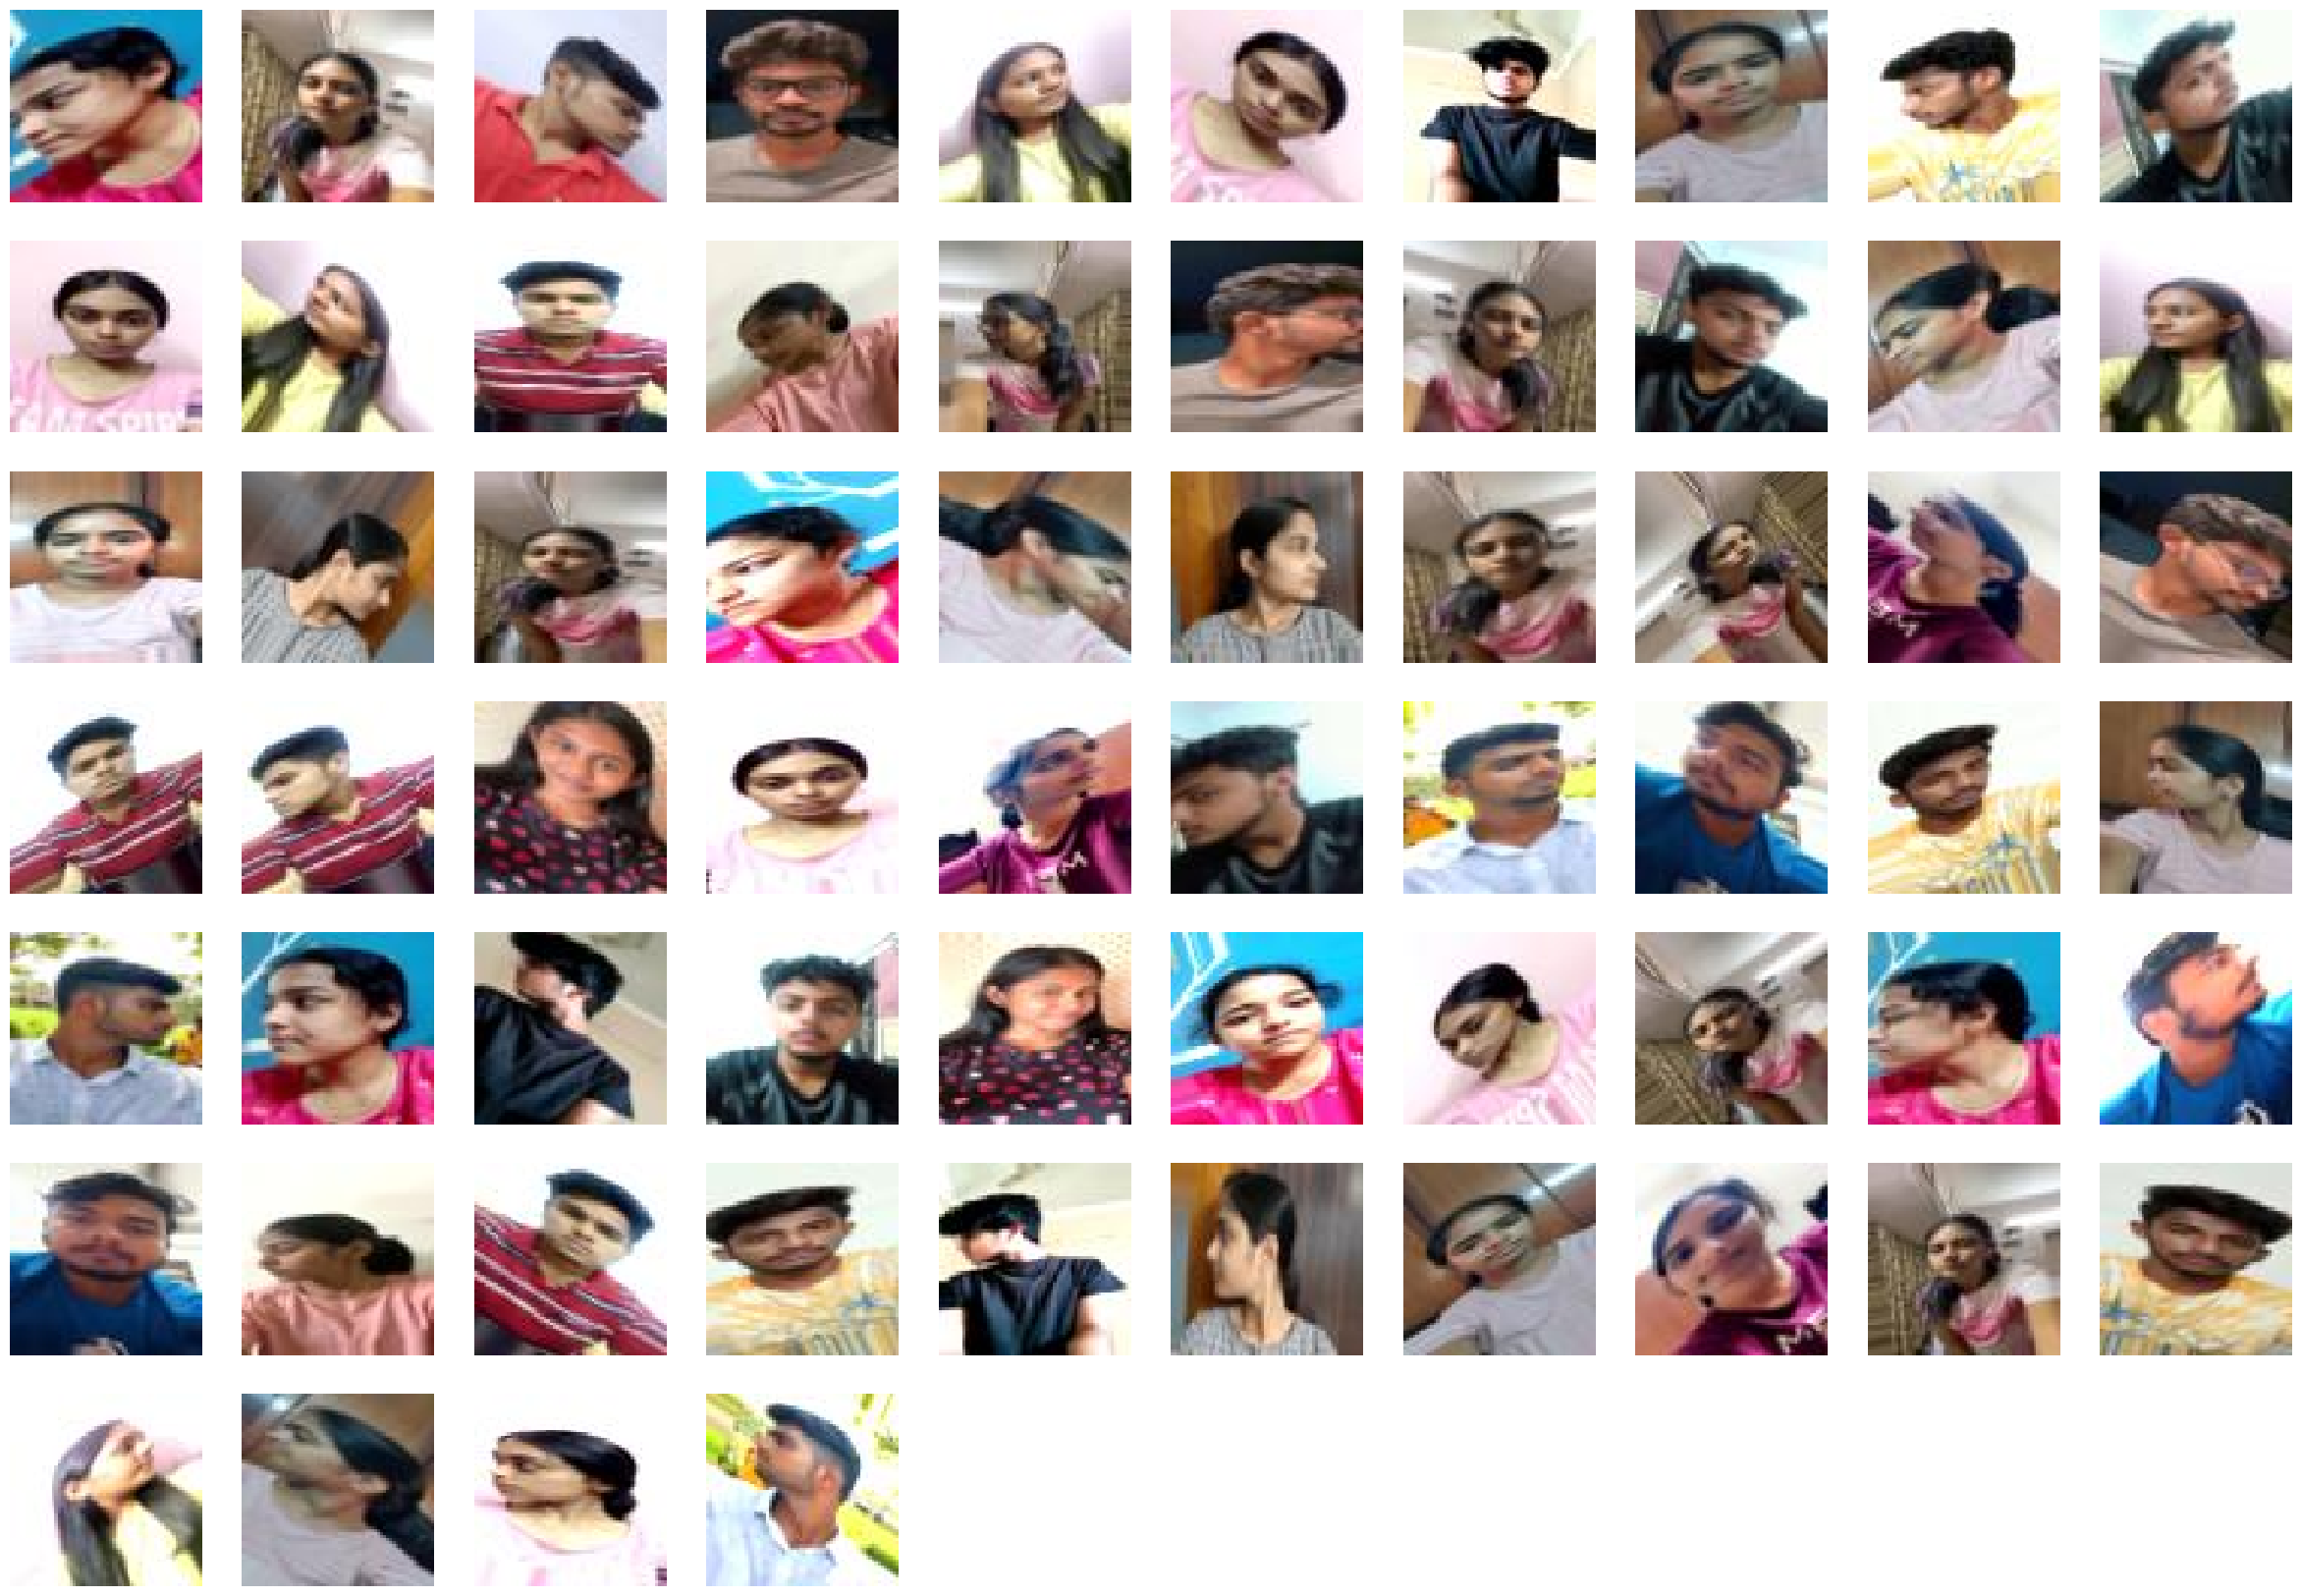

In [50]:
training_set = train_datagen.flow_from_directory('custom/Split/augmented_train',
                                                 target_size = input_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('custom/Split/augmented_validation',
                                            target_size = input_size,
                                            batch_size = batch_size,
                                            class_mode = 'categorical')



def plots(ims, figsize=(30,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(10, 10, i+1)
        sp.axis('Off')
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
imgs, labels = next(training_set)
print(len(imgs))
plots(imgs, titles=labels)